### Importing Libraries

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

### Downloading and Extracting Data

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path, _ = os.path.splitext(zip_path)


In [ ]:
df=pd.read_csv(csv_path)

In [ ]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


### Data Preprocessing

In [ ]:
# Selecting the rows with 1hr time gap instead of 10 minutes time gap
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [ ]:
### index of the DataFrame is set to the parsed date and time from the "Date Time" column.
df.index = pd.to_datetime(df['Date Time'], format = '%d.%m.%Y %H:%M:%S')
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


### Data Visualization for Temperature

<Axes: xlabel='Date Time'>

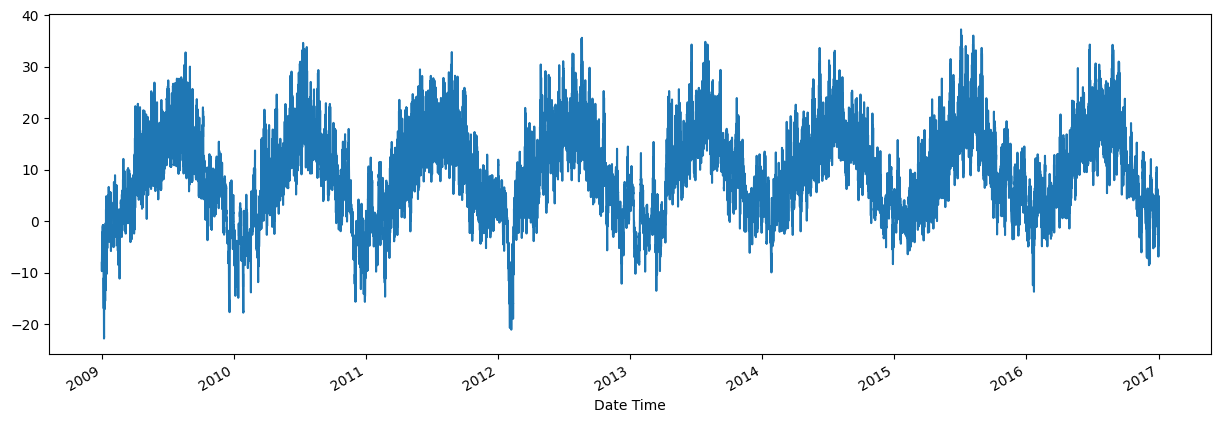

In [ ]:
temp = df["T (degC)"]
temp.plot(figsize=(15,5))

### Data Transformation:

In [ ]:
def  df_to_Xy(df, window_size=5):
    '''transform the time series data into sequences of 
    input-output pairs.
    '''
  df_np = df.to_numpy()
  X=[]
  y=[]
  for i in range(len(df_np)-window_size):
    row = [[a] for a in df_np[i: i+window_size]]
    X.append(row)
    label = df_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
Window_size = 5
X, y =df_to_Xy(temp, Window_size)
X.shape, y.shape

((70086, 5, 1), (70086,))

### Data Splitting

In [ ]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

### Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Model Compilation

In [ ]:
from keras.src.optimizers.optimizer_v1 import Optimizer
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


### Model Training

In [ ]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 23.5653 - root_mean_squared_error: 4.8544 - val_loss: 1.2047 - val_root_mean_squared_error: 1.0976
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.8355 - root_mean_squared_error: 1.3548 - val_loss: 0.6234 - val_root_mean_squared_error: 0.7896
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.9014 - root_mean_squared_error: 0.9494 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7224
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7310 - root_mean_squared_error: 0.8550 - val_loss: 0.5126 - val_root_mean_squared_error: 0.7160
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6890 - root_mean_squared_error: 0.8300 - val_loss: 0.5092 - val_root_mean_squared_error: 0.7136
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6715 - root_mean_squared_error: 0.8194 - val_

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')


### Model Evaluation, Validation and Visualization

In [ ]:
train_pred = model1.predict(X_train).flatten()
train_res = pd.DataFrame(data = {'Train Pred': train_pred, "Actual" : y_train})
train_res

1875/1875 [==============================] - 5s 3ms/step


,Train Pred,Actual
0,-9.810969,-9.67
1,-9.666060,-9.17
2,-8.750507,-8.10
3,-7.256608,-7.66
4,-7.118785,-7.04
...,...,...
59995,6.009469,6.07
59996,7.290929,9.88
59997,12.208234,13.53
59998,16.101196,15.43


In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(train_res['Train Pred'])
# plt.plot(train_res[])

<Axes: >

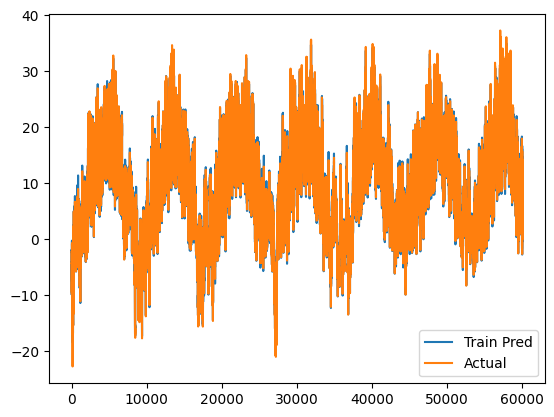

In [ ]:
train_res.plot()

In [ ]:
test_pred = model1.predict(X_test).flatten()
test_res = pd.DataFrame(data = {'Test Pred': test_pred, "Actual" : y_test})
test_res

159/159 [==============================] - 1s 3ms/step


,Train Pred,Actual
0,14.496972,13.99
1,13.359628,13.46
2,12.934540,12.93
3,12.518645,12.43
4,12.067783,12.17
...,...,...
5081,-1.124474,-0.98
5082,-1.576143,-1.40
5083,-1.768049,-2.75
5084,-3.334426,-2.89


<Axes: >

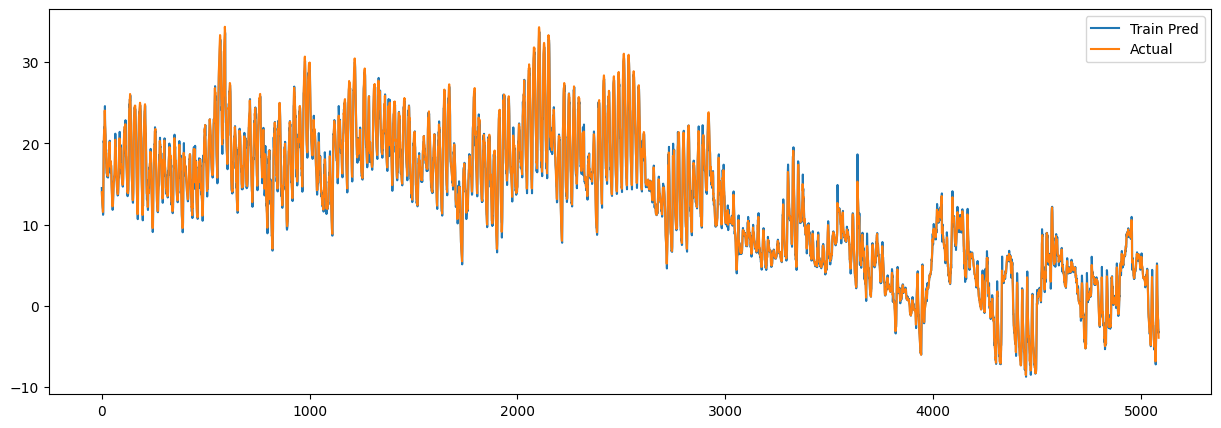

In [ ]:
test_res.plot(figsize=(15,5))

<Axes: >

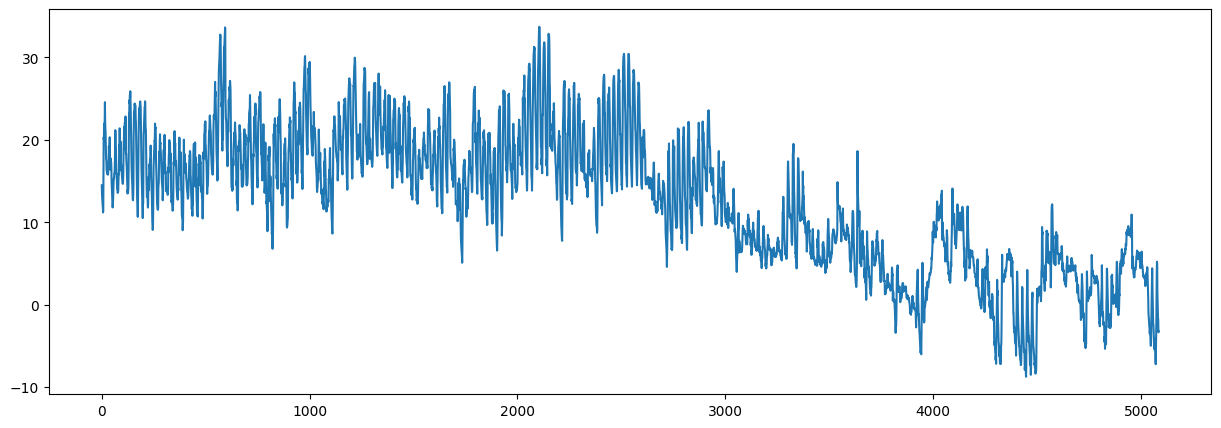

In [ ]:
test_res['Train Pred'].plot(figsize=(15,5))

In [ ]:
test_val = model1.predict(X_val).flatten()
test_val = pd.DataFrame(data = {'Test val': test_val, "Actual" : y_val})
test_val

157/157 [==============================] - 1s 3ms/step


,Train val,Actual
0,15.510831,14.02
1,13.345821,13.67
2,13.133094,12.27
3,11.607762,11.19
4,10.459417,10.85
...,...,...
4995,17.422960,18.27
4996,17.432688,17.85
4997,17.275990,16.65
4998,15.962775,15.85


<Axes: >

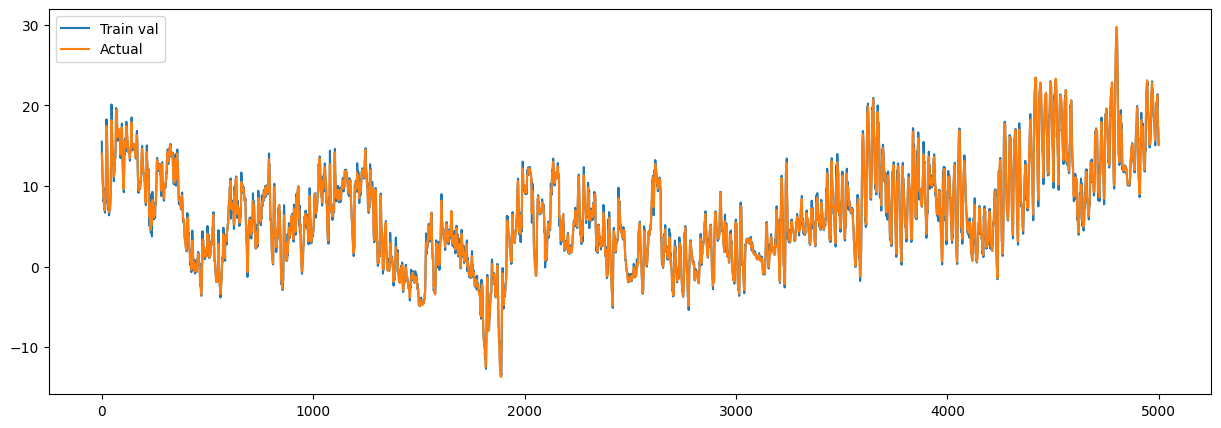

In [ ]:
test_val.plot(figsize=(15,5))